In [26]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [6]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

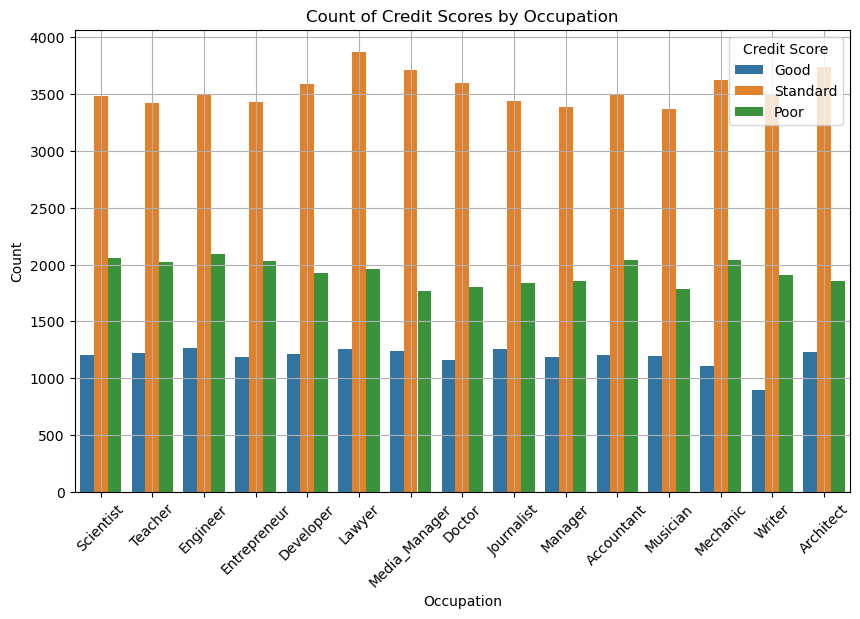

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'Credit Score' and 'Occupation'

plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.title('Count of Credit Scores by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Credit Score')
plt.show()


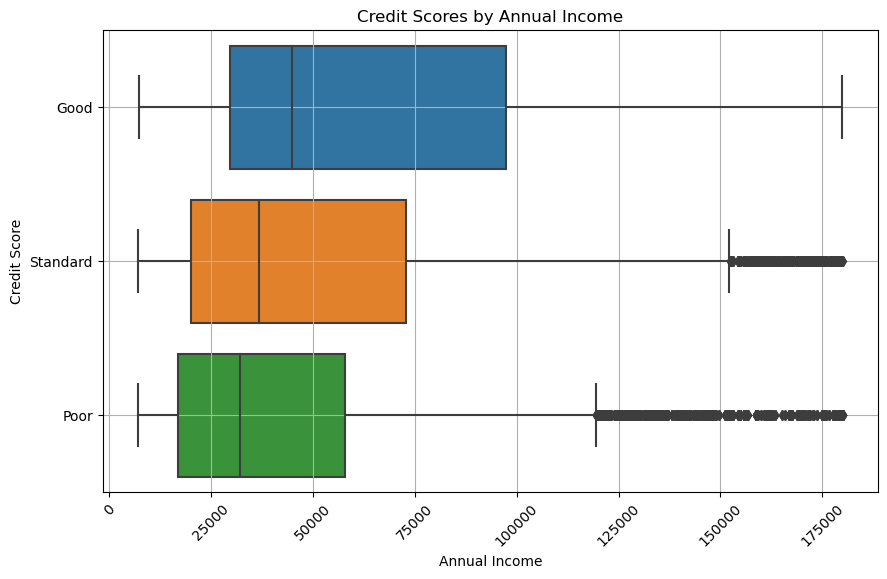

In [8]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Annual_Income', y='Credit_Score', data=df)
plt.title('Credit Scores by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


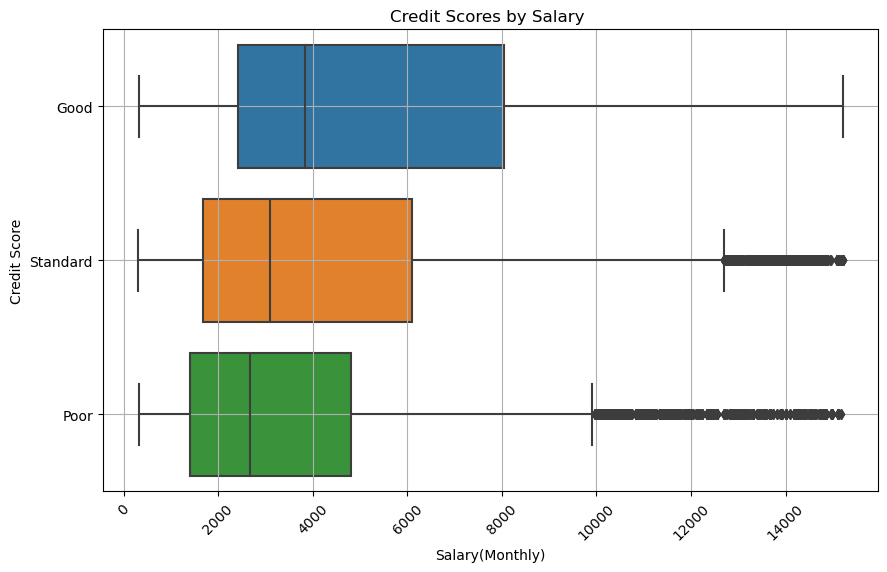

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Monthly_Inhand_Salary', y='Credit_Score', data=df)
plt.title('Credit Scores by Salary ')
plt.xlabel('Salary(Monthly)')
plt.ylabel('Credit Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

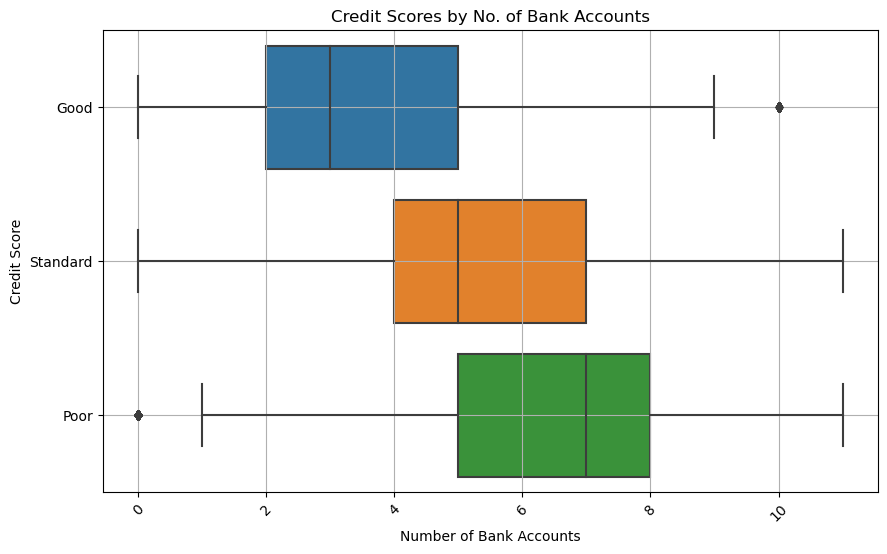

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Bank_Accounts', y='Credit_Score', data=df)
plt.title('Credit Scores by No. of Bank Accounts')
plt.xlabel('Number of Bank Accounts')
plt.ylabel('Credit Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

LESSER NUMBER OF BANK ACCOUNT , HIGHER THE CREDIT SCORE

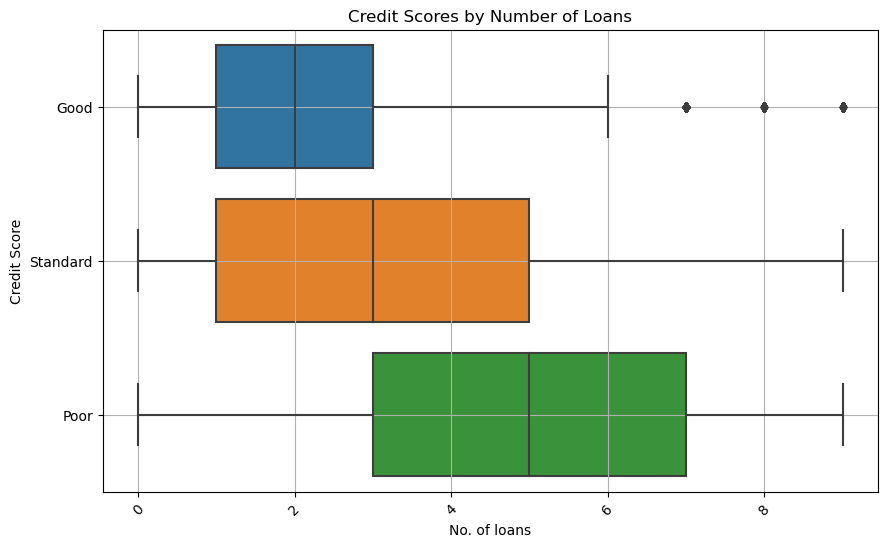

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_of_Loan', y='Credit_Score', data=df)
plt.title('Credit Scores by Number of Loans')
plt.xlabel('No. of loans')
plt.ylabel('Credit Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

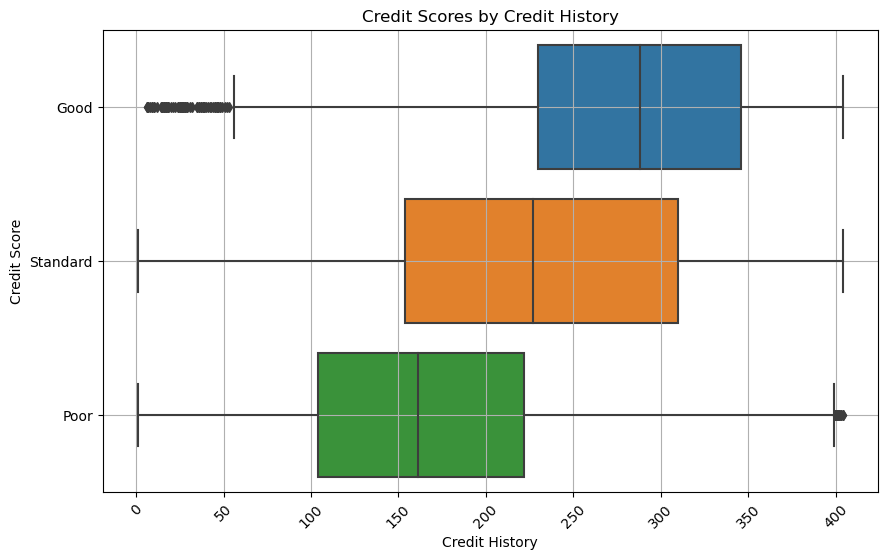

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit_History_Age', y='Credit_Score', data=df)
plt.title('Credit Scores by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Credit Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Long Credit History Leads to better Credit Score

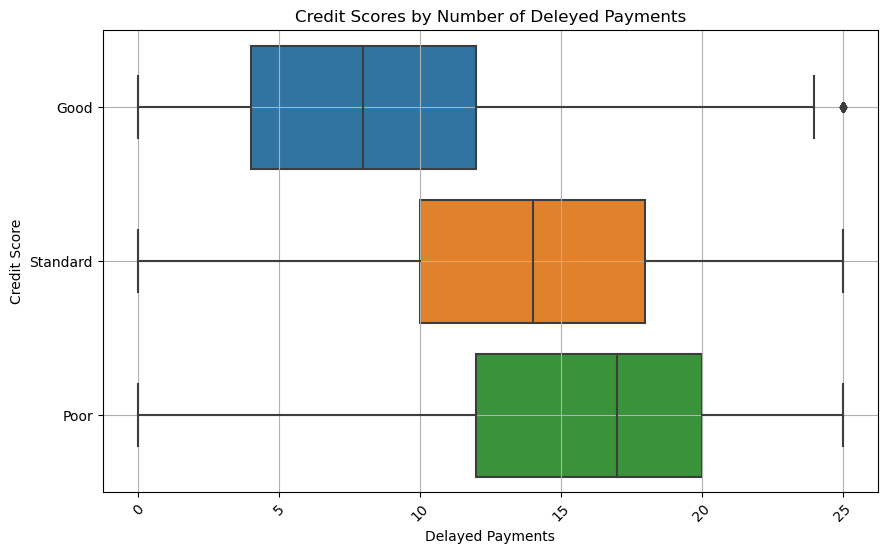

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_of_Delayed_Payment', y='Credit_Score', data=df)
plt.title('Credit Scores by Number of Deleyed Payments')
plt.xlabel('Delayed Payments')
plt.ylabel('Credit Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Less Numer of Delayed Payment , Higher the Credit Score

# Credit Score Classification Model using Random Forest

In [14]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, "Good": 2,"Bad": 0})

In [40]:
from sklearn.model_selection import train_test_split
x = np.array(df[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate", "Num_of_Loan","Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt","Credit_History_Age", "Monthly_Balance"]])
y = np.array(df[["Credit_Score"]])
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(x)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.20,random_state=42)

              precision    recall  f1-score   support

        Good       0.78      0.77      0.77      3527
        Poor       0.80      0.84      0.82      5874
    Standard       0.83      0.82      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



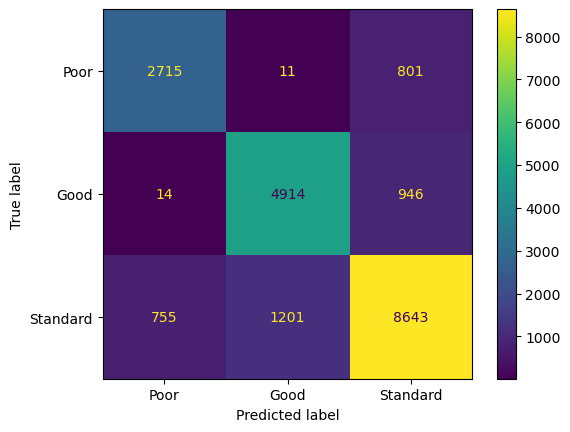

In [42]:
#Train the Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain.ravel())
#model.fit(x_train,y_train)
y_pred = model.predict(xtest)
print(classification_report(ytest,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(ytest,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

#  Classification Model Using KNN Classifier

In [ ]:
error = []
for i in range (1,20):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= i).fit(xtrain, ytrain.ravel()) 
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))
    knn
plt.figure(figsize= (12, 6))
plt.plot(range(1,20),error , color ="red",linestyle = "dashed", marker = "o", markerfacecolor="blue",markersize = 10)
plt.title("error size K value")
plt.xlabel("k value")
plt.ylabel("mean error")

In [51]:
knn = KNeighborsClassifier(n_neighbors= 3, metric = "minkowski", p = 2).fit(xtrain, ytrain.ravel())
knn

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

        Good       0.70      0.74      0.72      3527
        Poor       0.78      0.80      0.79      5874
    Standard       0.80      0.78      0.79     10599

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



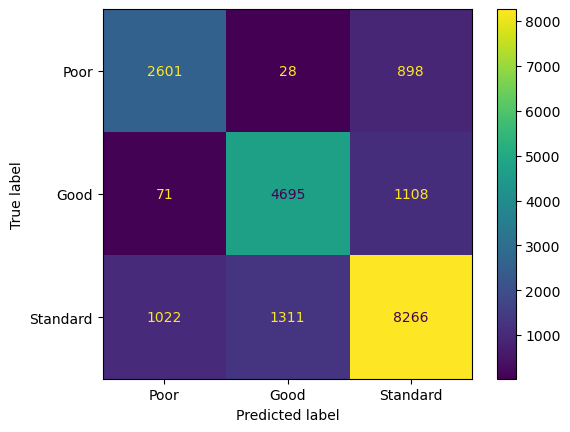

In [52]:
yhat = knn.predict(xtest)
print(classification_report(ytest,yhat))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(ytest,yhat),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()